In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\coding\ML\Machine learning\diabetes\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [5]:
data.dropna(inplace=True)

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


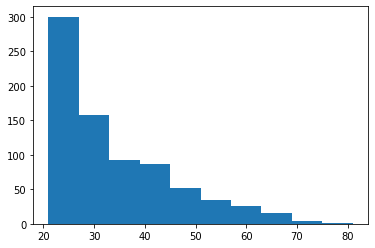

In [7]:
import matplotlib.pyplot as plt
age = plt.hist(data['Age'])
plt.show()

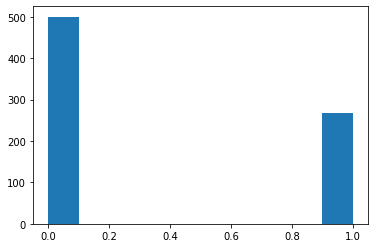

In [8]:
import matplotlib.pyplot as plt
age = plt.hist(data['Outcome'])
plt.show()

In [9]:
data.corrwith(data['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [10]:
import numpy as np
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=2)

In [12]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124,74,36,0,27.8,0.100,30
429,1,95,82,25,180,35.0,0.233,43
623,0,94,70,27,115,43.5,0.347,21
209,7,184,84,33,0,35.5,0.355,41
589,0,73,0,0,0,21.1,0.342,25


In [13]:
y_train.head()

602    0
429    1
623    0
209    1
589    0
Name: Outcome, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
model_predict = model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_predict)

0.7662337662337663

In [17]:
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model_predict = dec_model.fit(x_train, y_train)

In [18]:
dec_predict = dec_model.predict(x_test)

In [19]:
accuracy_score(y_test, dec_predict)

0.7467532467532467

In [20]:
from sklearn.ensemble import RandomForestClassifier
r_model = DecisionTreeClassifier()
r_model_predict = r_model.fit(x_train, y_train)

In [21]:
r_mpredict = r_model.predict(x_test)

In [22]:
accuracy_score(y_test, r_mpredict)

0.7337662337662337

In [23]:
import pickle
filename = 'model'
pickle.dump(model, open(filename, 'wb'))